# Generating Data

RHEOS has several convenience functions for generating arbitrarily complex loading patterns. These may be particularly useful for investigating the responses of viscoelastic models with which users are unfamiliar. 

In [6]:
using RHEOS
using PyPlot

**Step 1: Generate timeline**

The first step requires the generation of a RheoTimeData struct with only the time data. This is achieved with the [`timeline`](@ref) function. If no parameter is specificed, it generates a time data from (t\_start =0) to (t\_end=10), with a default time step of (t\_start-t\_end)/250 = 0.04.

In [2]:
datat = timeline(t_start=0, t_end=20.0, step = 0.02)
RheoTimeDataType(datat)

time_only::TimeDataType = 0

**Step 2: Generate stress or strain data**

The user can decide either to generate strain data ([`strainfunction`](@ref) function) or stress data ([`stressfunction`](@ref) function). Both functions require a RheoTimeData with time data defined and a function that takes the time as an input to generate the desired set of data. Both function return a new RheoTimeData strut with time data and either stress or strain data. Below is an example.

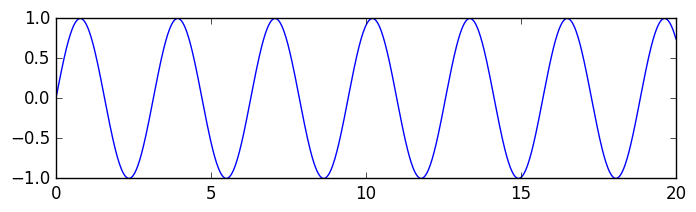

strain_only::TimeDataType = 1

In [3]:
# calculates strain data by applying a function of time
dsin=strainfunction(datat,t->sin(2*t));

fig, ax = subplots(1,1, figsize=(8,2));
plot(dsin.t,dsin.ϵ);
RheoTimeDataType(dsin)

## Pre-defined functions

RHEOS provides already some functions that can be directly applied to a timeline. Below is the complete list with examples. Note that if the keyword arguments for the functions are not defined, default parameters are used (see the [API](@ref) section). In the examples below the strain data is generated, the same can be applied to the stress by replacing "strainfunction" with "stressfunction". 

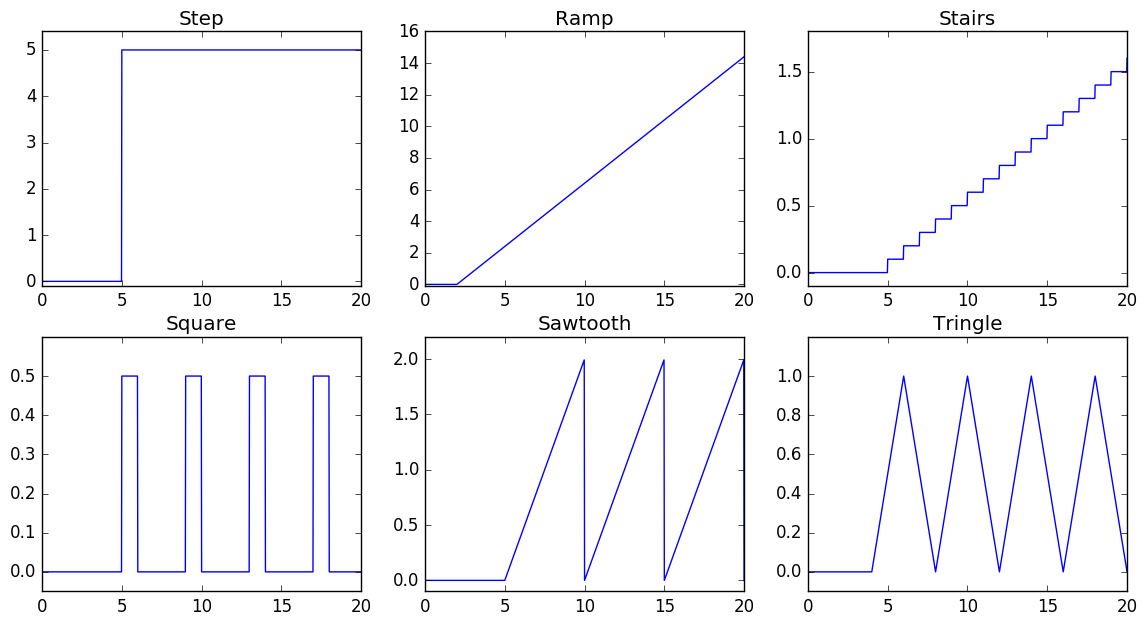

In [4]:
fig, ax = subplots(2,3, figsize=(14,7));

# Step generation
dstep = strainfunction(datat,hstep(offset=5.0,amp=5));
    # Plotting
    ax[1,1].plot(dstep.t,dstep.ϵ);
    ax[1,1].set_ylim(bottom = -0.1, top=5.4);
    ax[1,1].set_title("Step");

# Ramp generation
dramp = strainfunction(datat,ramp(offset=2.0,gradient=0.8));
    ax[1,2].plot(dramp.t,dramp.ϵ);
    ax[1,2].set_ylim(bottom = -0.1);
    ax[1,2].set_title("Ramp");

# Stairs generation
dstairs = strainfunction(datat,stairs(offset=5.0,amp=0.1,width=1));
    ax[1,3].plot(dstairs.t,dstairs.ϵ);
    ax[1,3].set_ylim(bottom = -0.1);
    ax[1,3].set_title("Stairs");

# Square generation
dsquare = strainfunction(datat,square(offset=5.0,amp=0.5,period=4, width=1));
    ax[2,1].plot(dsquare.t,dsquare.ϵ);
    ax[2,1].set_ylim(bottom = -0.05, top=0.6);
    ax[2,1].set_title("Square");

# Sawtooth generation
dsawtooth = strainfunction(datat,sawtooth(offset=5.0,amp=2,period=5));
    ax[2,2].plot(dsawtooth.t,dsawtooth.ϵ);
    ax[2,2].set_ylim(bottom = -0.1, top=2.2);
    ax[2,2].set_title("Sawtooth");

# Triangle generation
dtriangle = strainfunction(datat,triangle(offset=4.0,amp=1,period=4));
    ax[2,3].plot(dtriangle.t,dtriangle.ϵ);
    ax[2,3].set_ylim(bottom = -0.1, top=1.2);
    ax[2,3].set_title("Tringle");

## More complex patterns

More complicated patterns can be generate by making use of the possibility to add, subtract, multiply RheoTimeData strut. Note that addition and subtraction can be performed only if the data have the same sample rate.

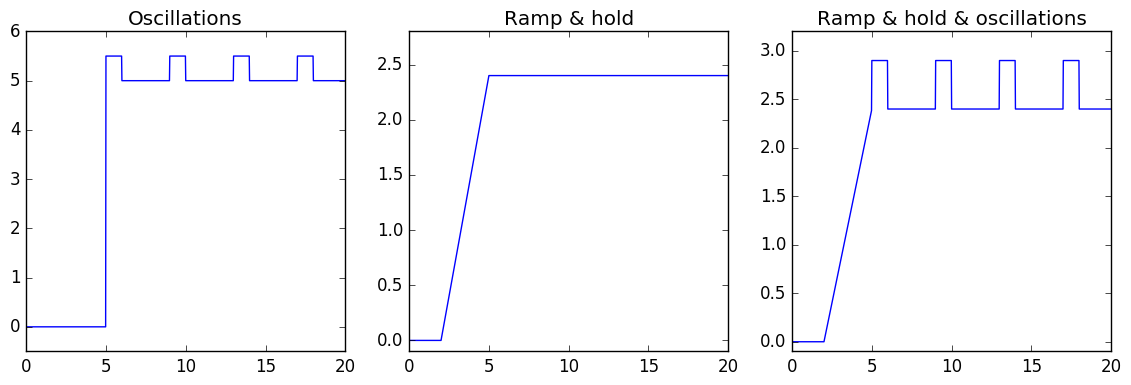

In [5]:
fig, ax = subplots(1,3,figsize=(14,4));

# Ramp & hold
dhold = dramp - strainfunction(datat,ramp(offset=5.0,gradient=0.8));
    ax[2].plot(dhold.t,dhold.ϵ);
    ax[2].set_ylim(bottom = -0.1, top=2.8);
    ax[2].set_title("Ramp & hold");

# Step with oscillatory loading
doscil = dstep + dsquare;
    ax[1].plot(doscil.t,doscil.ϵ);
    ax[1].set_ylim(bottom = -0.5, top=6);
ax[1].set_title("Oscillations");

# Ramp & hold & oscillation
dcomplex = dhold + dsquare
    ax[3].plot(dcomplex.t,dcomplex.ϵ);
    ax[3].set_ylim(bottom = -0.1, top=3.2);
    ax[3].set_title("Ramp & hold & oscillations");